# EPIC
# Ireland Greenhouse Gas Emmisions

---
# Setup

In [74]:
import numpy as np
import pandas as pd
from pandas import read_csv


---
# Preprocessing

## World Bank

In [75]:
def read_world_bank(csv: str):
    df = read_csv(csv)
    # Extract the relevant years from the Ireland entry
    df = df[df['Country Code'] == 'IRL'].iloc[:, 34:-4]
    # Convert to a column from a row
    df = df.transpose().reset_index()
    # Rename the columns and reset datatypes
    df.columns = ['Year', 'Value']
    return df.astype({'Year': 'int64'})
    
    

## EV Sales

In [76]:
# Read from the csv file
ev_sales = read_csv('data/ev_sales.csv')
# Extract the year from the list of months
# This is formatted as 2020M01, 2020M02 etc.
ev_sales['Year'] = ev_sales['Month'].str[:4]
# Aggregate the values into one value per year
ev_sales = ev_sales.groupby(['Year'])['VALUE'].sum().reset_index().astype({'Year': 'int64'})
ev_sales

,Year,VALUE
0,2013,87
1,2014,263
2,2015,497
3,2016,411
4,2017,664
5,2018,1328
6,2019,3803
7,2020,4443
8,2021,9616
9,2022,16268


## Fill past values for EV Sales

In [77]:
# Fill the table with zeros
zeros = [[year, 0] for year in range(1990, 2013)]
zeros = pd.DataFrame(zeros, columns=['Year', 'VALUE'])
ev_sales = pd.concat([zeros, ev_sales], ignore_index=True)
ev_sales

,Year,VALUE
0,1990,0
1,1991,0
2,1992,0
3,1993,0
4,1994,0
5,1995,0
6,1996,0
7,1997,0
8,1998,0
9,1999,0


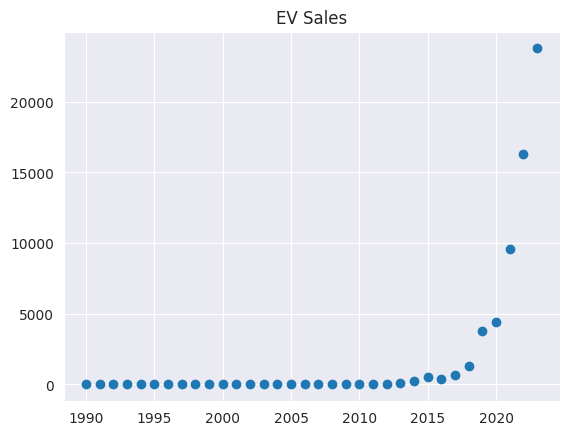

In [78]:
from matplotlib import pyplot as plt

plt.scatter(ev_sales['Year'], ev_sales['VALUE'])
plt.title('EV Sales')
plt.show()

In [79]:
# Remove years past 2019 for analysis
ev_sales = ev_sales[ev_sales['Year'] < 2020]

# Merge Tables

In [80]:
co2 = read_world_bank('data/CO2-Emissions.csv')
renewable_energy = read_world_bank('data/Renewable-Energy.csv')
trees = read_csv('data/Forest_Cover.csv')
construction = read_csv('data/ireland_construction.csv').query('Year >= 1990')
public_transport = read_csv('data/Public_transport_investments.csv')
datacentres = read_csv('data/datacentres.csv')


df = pd.merge(ev_sales, trees, on='Year', how='outer')
df = pd.merge(df, construction, on='Year', how='outer')
df = pd.merge(df, public_transport, on='Year', how='outer')
df = pd.merge(df, datacentres, on='Year', how='outer')
df = pd.merge(df, renewable_energy, on='Year')
df = pd.merge(df, co2, on='Year')

df.fillna(0)
df.replace(np.nan, 0, inplace=True)
df.columns = ['Year', 'EV Sales', 'Forest Cover %', 'Construction Emissions',
              'Public Transport Investment', 'Datacentres', 'Renewable Energy', 'CO2']
df

,Year,EV Sales,Forest Cover %,Construction Emissions,Public Transport Investment,Datacentres,Renewable Energy,CO2
0,1990,0,6.900000,13.251411,600.154,0.0,2.28,8.810964
1,1991,0,7.100000,13.313802,800.234,0.0,2.23,8.903398
2,1992,0,7.300000,12.325657,830.345,0.0,2.17,8.853736
3,1993,0,7.500000,12.778316,900.432,0.0,2.11,8.851032
4,1994,0,7.700000,12.983770,1000.512,0.0,2.18,9.140716
5,1995,0,7.900000,12.932884,1100.623,0.0,1.93,9.268405
6,1996,0,8.100000,11.801059,1200.732,0.0,1.95,9.572812
7,1997,0,8.300000,12.489283,1180.321,0.0,1.91,9.790644
8,1998,0,8.500000,11.542553,1250.123,0.0,2.30,10.348006
9,1999,0,8.700000,11.636829,1500.210,0.0,2.08,10.645960


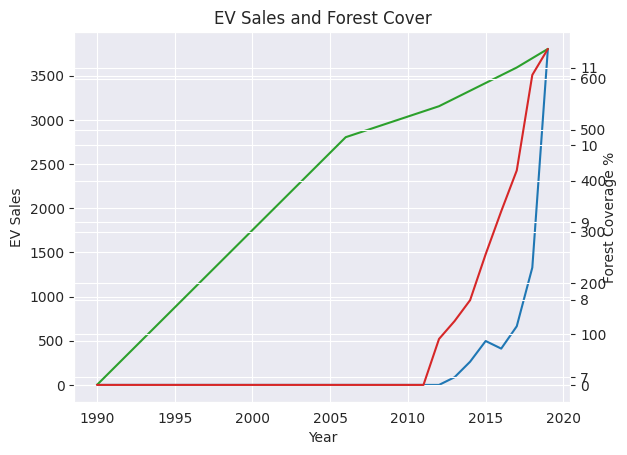

In [81]:
_, ax1 = plt.subplots()
ax1.plot(df['Year'], df['EV Sales'])
ax1.set_xlabel('Year')
ax1.set_ylabel('EV Sales')
ax2 = ax1.twinx()
ax2.plot(df['Year'], df['Forest Cover %'], color='tab:green')
ax2.set_ylabel('Forest Coverage %')
ax3 = ax1.twinx()
ax3.plot(df['Year'], df['Datacentres'], color='tab:red')
plt.title('EV Sales and Forest Cover')
plt.show()

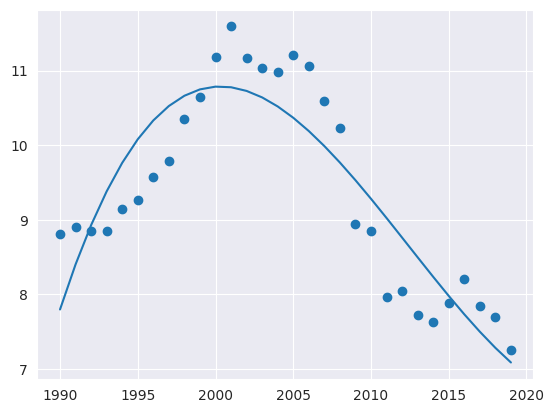

In [82]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

x = co2[['Year']]
y = co2['Value']

degree = 3

poly = PolynomialFeatures(degree=degree, include_bias=False)
poly_features = poly.fit_transform(x)
model = LinearRegression()
model.fit(poly_features, y)
y_predicted = model.predict(poly_features)

plt.scatter(x, y)
plt.plot(x, y_predicted)
plt.show()

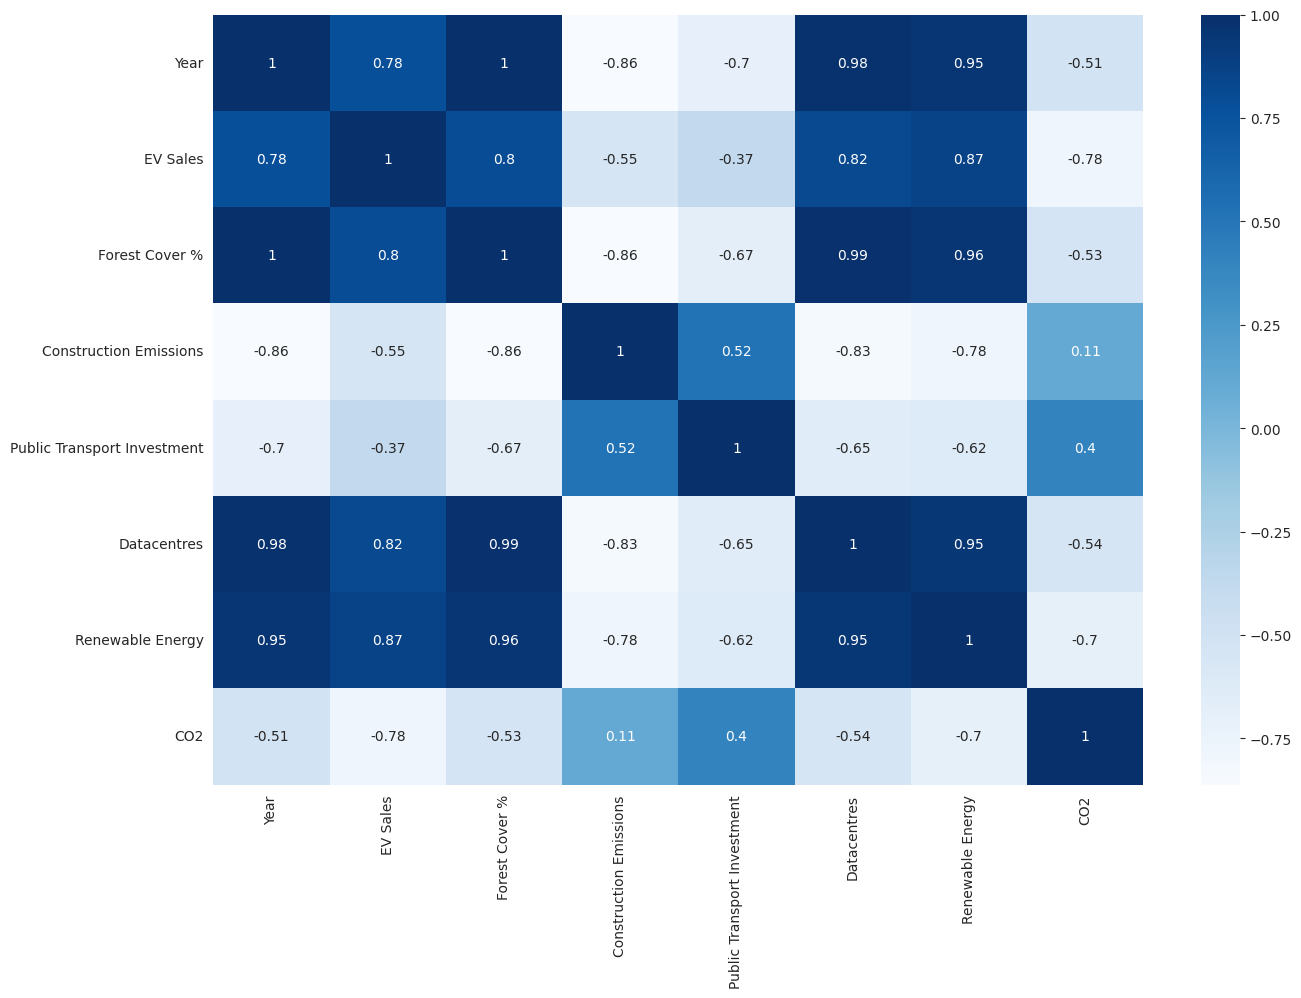

In [83]:
import seaborn as sns
co2.columns = ['Year', 'CO2']
corr_matrix = df.query('Year > 2010').corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap='Blues')
plt.show()

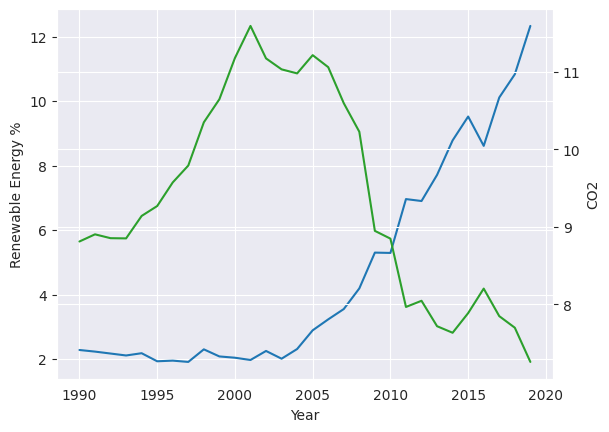

In [84]:
_, ax1 = plt.subplots()
ax1.plot(df['Year'], df['Renewable Energy'])
ax1.set_xlabel('Year')
ax1.set_ylabel('Renewable Energy %')
ax2 = ax1.twinx()
ax2.plot(df['Year'], df['CO2'], color='tab:green')
ax2.set_ylabel('CO2')
plt.show()
